<a href="https://colab.research.google.com/github/ahmeda335/Clustering_Projects/blob/main/Customer_Segmentation_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Data.csv')

## **Showing the Data and Detecting null values**

In [4]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
# Getting the number of rows and columns.
data.shape

(8950, 18)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
# Finding missing values.
data.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [9]:
# Filling the null value found in the 'CREDIT_LIMIT' with the most frequent value.
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mode()[0], inplace=True)

# Fill null values found in 'MINIMUM_PAYMENTS' with the most frequent value.
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mode()[0], inplace=True)

In [10]:
data.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


## Removing Columns not needed in clustering, and getting the needed features to dectect clusters.

In [11]:
# I will cluster the data, so I will remove the first column
data_used = data.drop('CUST_ID', axis=1)

In [12]:
data_used.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,299.351881,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [13]:
# Getting the needed features.
features = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'TENURE']

x = data_used[features]

In [25]:
x.corr()

,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS,TENURE
BALANCE,1.000000,0.181261,0.531296,0.322802,0.072692
PURCHASES,0.181261,1.000000,0.356977,0.603264,0.086288
CREDIT_LIMIT,0.531296,0.356977,1.000000,0.421876,0.139222
PAYMENTS,0.322802,0.603264,0.421876,1.000000,0.106136
TENURE,0.072692,0.086288,0.139222,0.106136,1.000000


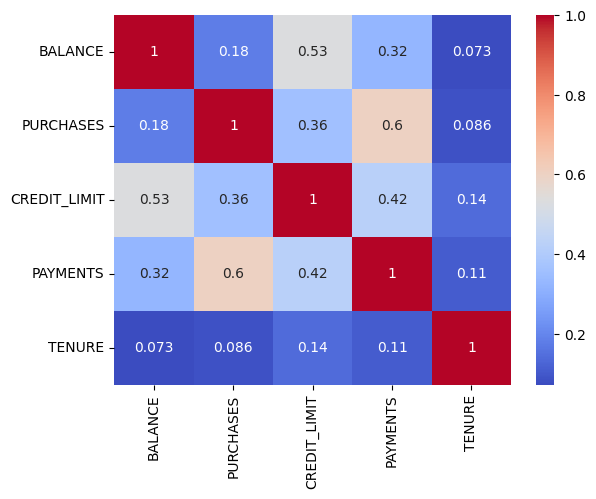

In [27]:
sns.heatmap(x.corr(), cmap='coolwarm', annot=True);

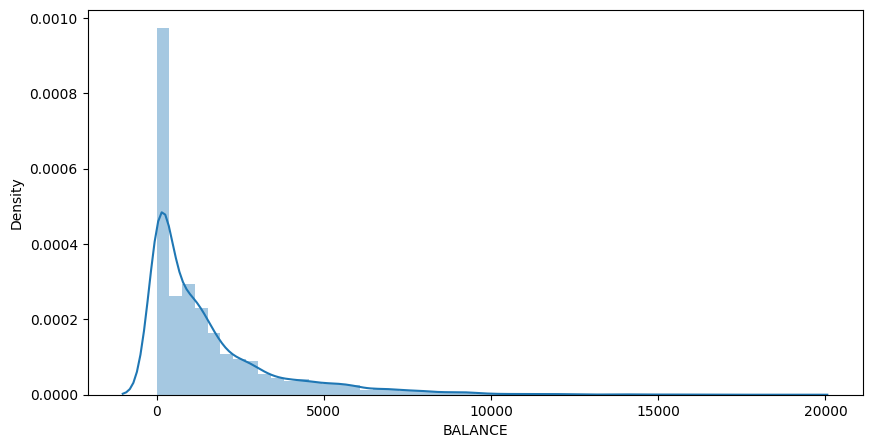

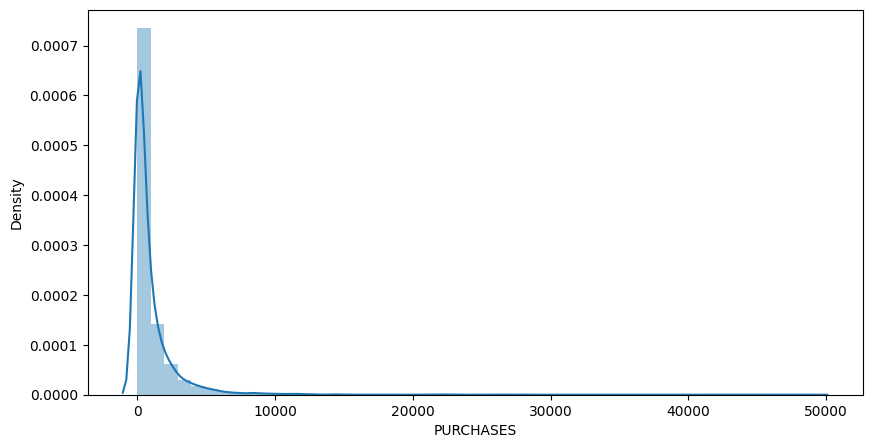

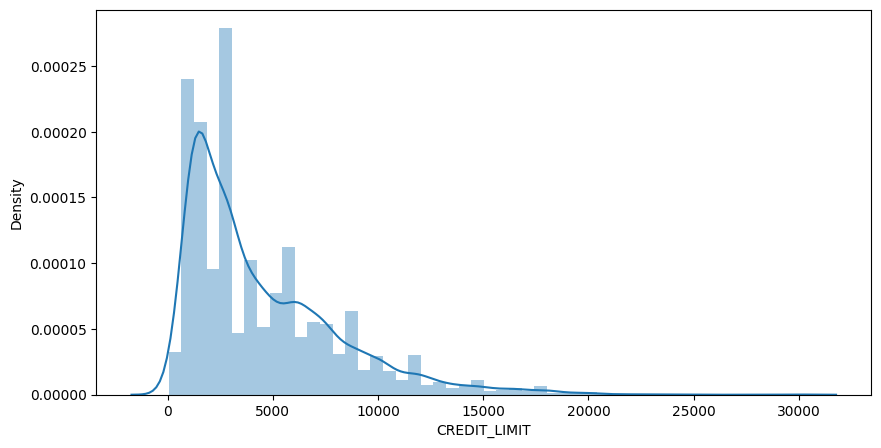

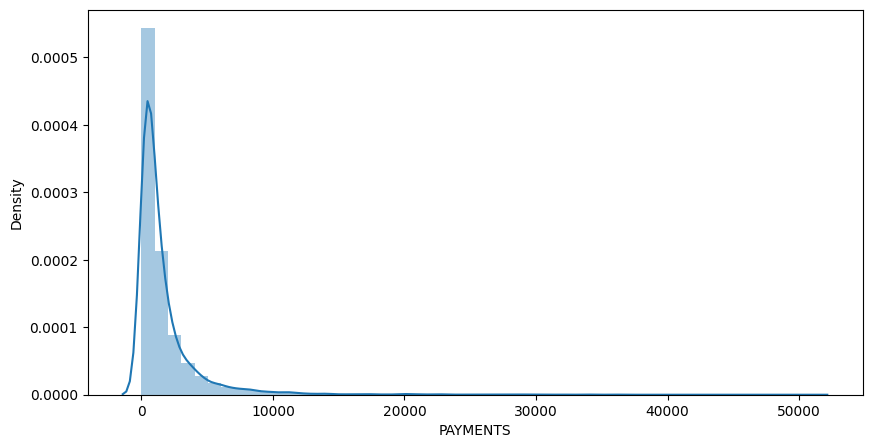

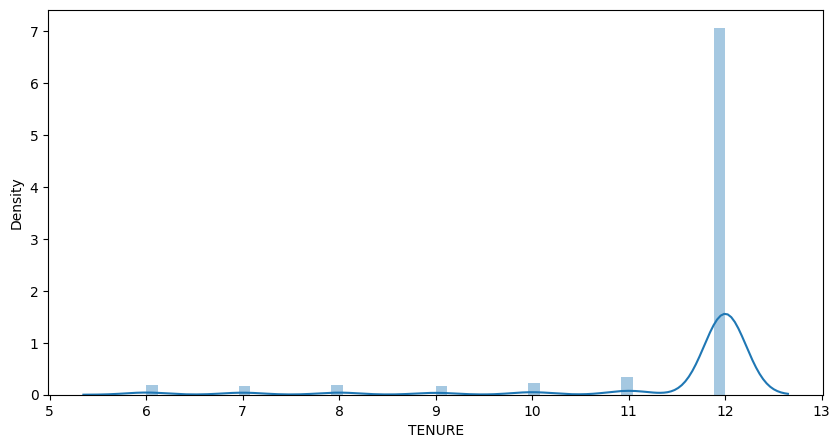

In [22]:
 for i in features:
  plt.figure(figsize=(10, 5))
  sns.distplot(x[i], kde=True);

In [14]:
x.head()

,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS,TENURE
0,40.900749,95.40,1000.0,201.802084,12
1,3202.467416,0.00,7000.0,4103.032597,12
2,2495.148862,773.17,7500.0,622.066742,12
3,1666.670542,1499.00,7500.0,0.000000,12
4,817.714335,16.00,1200.0,678.334763,12


## Use 'StandardScalse' as some of features are on different scales

In [15]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [29]:
x_scaled

array([[-0.73198937, -0.42489974, -0.9603784 , -0.52897879,  0.36067954],
       [ 0.78696085, -0.46955188,  0.68867844,  0.81864213,  0.36067954],
       [ 0.44713513, -0.10766823,  0.82609984, -0.38380474,  0.36067954],
       ...,
       [-0.7403981 , -0.40196519, -0.9603784 , -0.5706145 , -4.12276757],
       [-0.74517423, -0.46955188, -1.0977998 , -0.58053567, -4.12276757],
       [-0.57257511,  0.04214581, -0.90540984, -0.57686873, -4.12276757]])

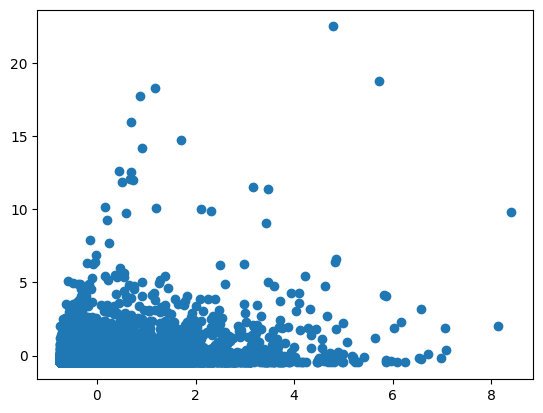

In [30]:
# Pltting the scaled x
plt.scatter(x_scaled[:,0], x_scaled[:,1]);  # (semiColon) here is put instead of writing (plt.show())
# plt.show()

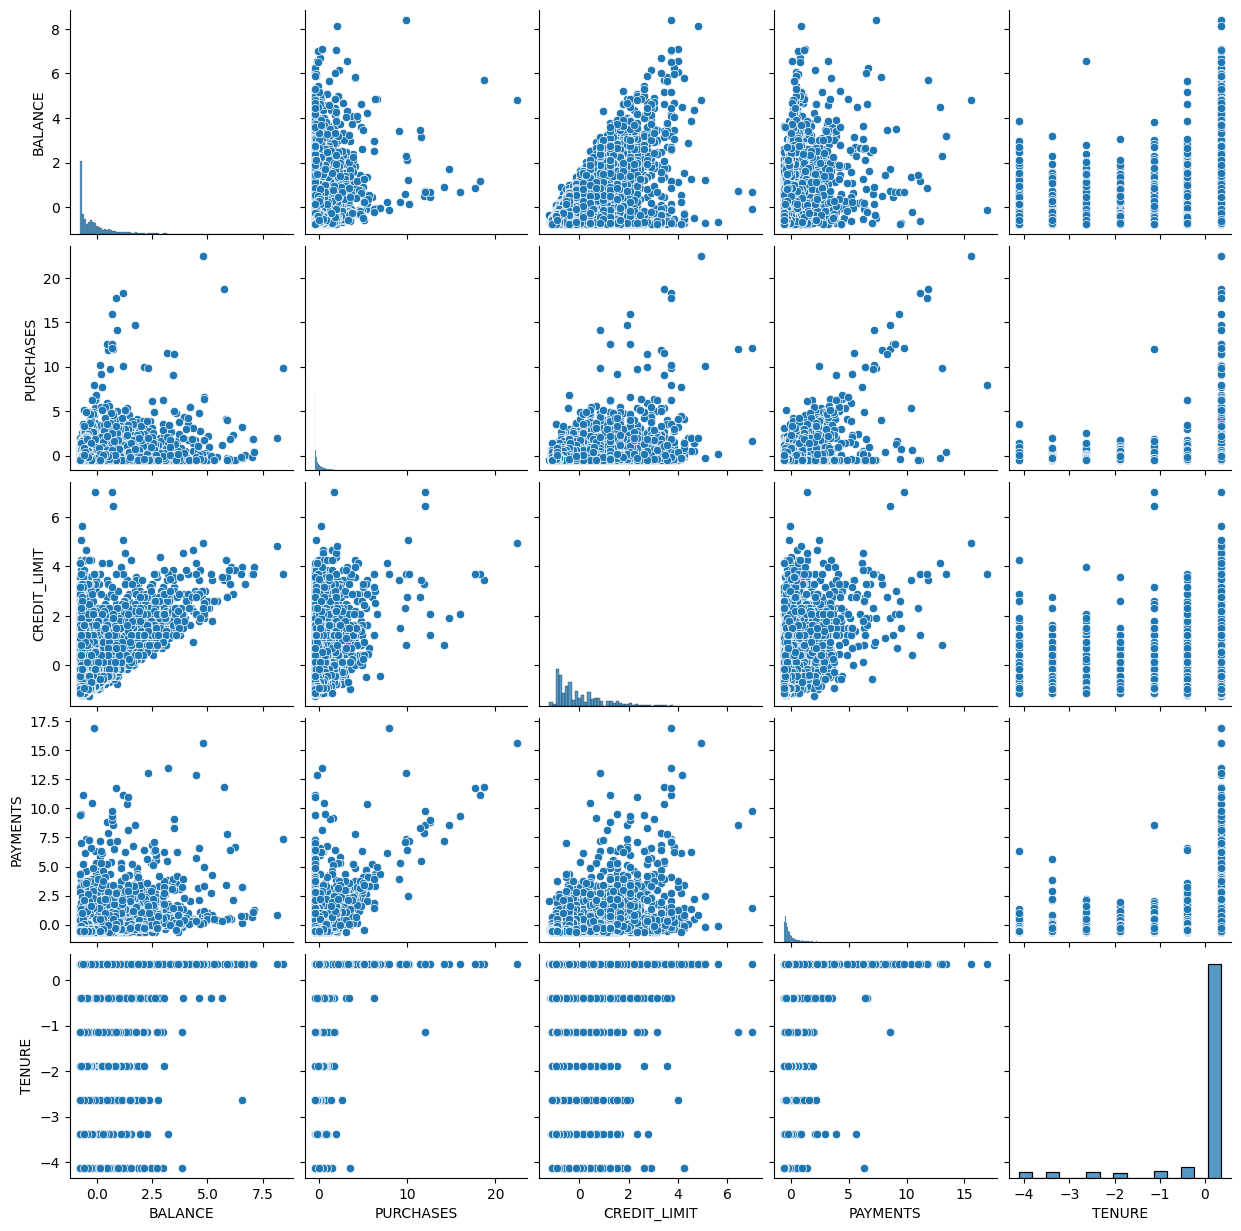

In [31]:
df_scaled = pd.DataFrame(x_scaled, columns=features)
sns.pairplot(df_scaled)
plt.show()

## **K_Means Clustering.** (Multivariate Clustering)

### Detecting best (k) using elbow & silhouette_score methods.



In [42]:
scores = []
k_range = range(1, 16)
for k in k_range:
  km = KMeans(n_clusters= k, random_state= 42)
  km.fit(x_scaled)
  scores.append(km.inertia_)

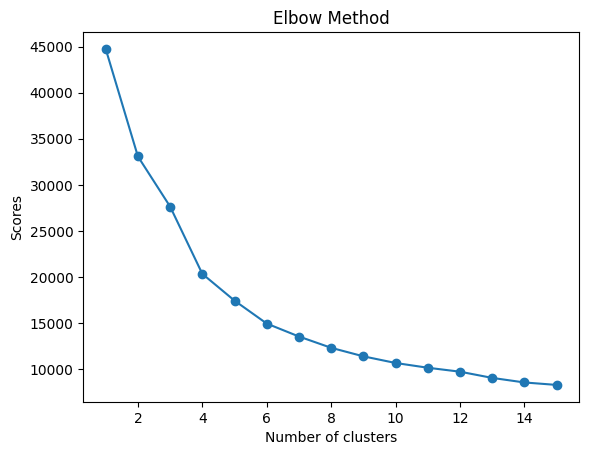

In [43]:
plt.plot(k_range, scores, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Scores')
plt.title('Elbow Method')
plt.show()

In [44]:
#silhoutte score ---> metric for clustering
from sklearn.metrics import silhouette_score
k_range = range(2, 16)
scores = []

for k in k_range:
  km = KMeans(n_clusters= k, random_state= 42)
  km.fit(x_scaled)
  scores.append(silhouette_score(x_scaled, km.labels_))

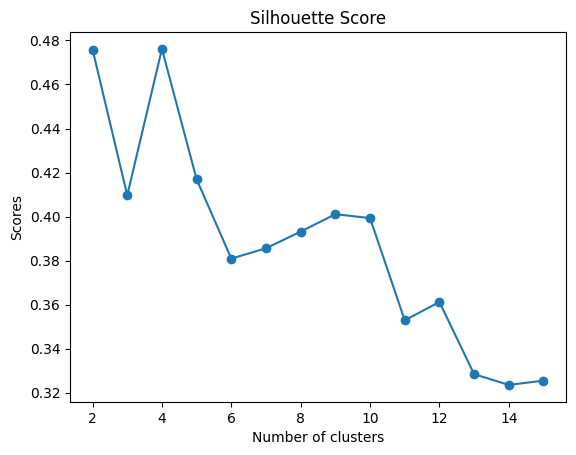

In [45]:
plt.plot(k_range, scores, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Scores')
plt.title('Silhouette Score')
plt.show()

### I will use 5 clusters.

In [46]:
km = KMeans(n_clusters= 5, random_state= 42)
km.fit(x_scaled)

KMeans(n_clusters=5, random_state=42)

In [47]:
data['Cluster_KMeans'] = km.fit_predict(x_scaled)

In [48]:
data['Cluster_KMeans'].value_counts()

,count
Cluster_KMeans,
3,5395
1,1709
2,983
4,744
0,119


In [49]:
data.groupby('Cluster_KMeans')[features].mean()

,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS,TENURE
Cluster_KMeans,,,,,
0,4887.248811,11737.110588,12678.991597,18223.106395,11.915966
1,1208.317604,2107.632194,7913.551253,3014.313528,11.921006
2,6068.921703,1043.715982,9199.445112,2848.559211,11.865717
3,865.833588,485.367711,2625.757398,900.737916,11.882484
4,965.766223,450.930202,2663.646953,715.068859,7.418011


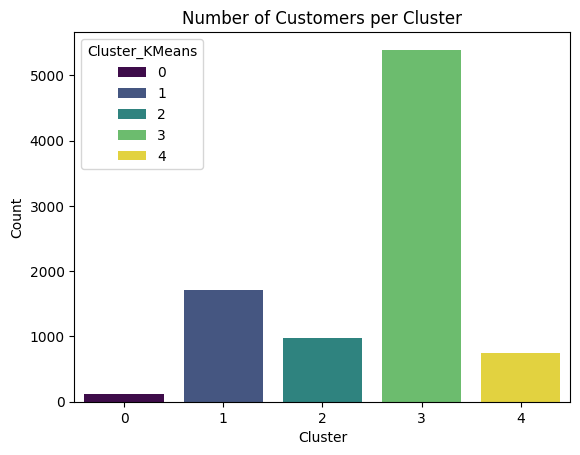

In [50]:
sns.countplot(x='Cluster_KMeans', data=data, palette='viridis', hue='Cluster_KMeans')
plt.title("Number of Customers per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

In [51]:
km.cluster_centers_

array([[ 1.59640103,  5.02402449,  2.24950842,  5.69620749,  0.29788617],
       [-0.16992836,  0.52245775,  0.94284468,  0.44920775,  0.3034028 ],
       [ 2.16259225,  0.01747747,  1.29214681,  0.38296479,  0.25892109],
       [-0.33581583, -0.24206143, -0.51116971, -0.28757047,  0.27264688],
       [-0.28764491, -0.25849317, -0.503137  , -0.35167857, -3.06317153]])

### As the data are in many dimensions, I will used PCA to plot it.

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
x_pca = pca.fit_transform(x_scaled)

In [53]:
df_pca = pd.DataFrame(x_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster_KMeans'] = data['Cluster_KMeans']

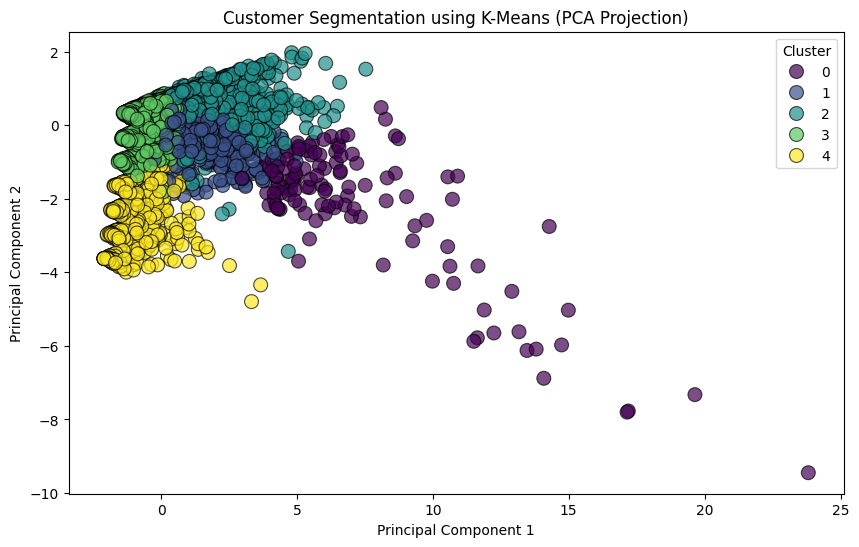

In [54]:
# Plotting clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_KMeans', palette='viridis', data=df_pca, s=100, alpha=0.7, edgecolors='k')
plt.title("Customer Segmentation using K-Means (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

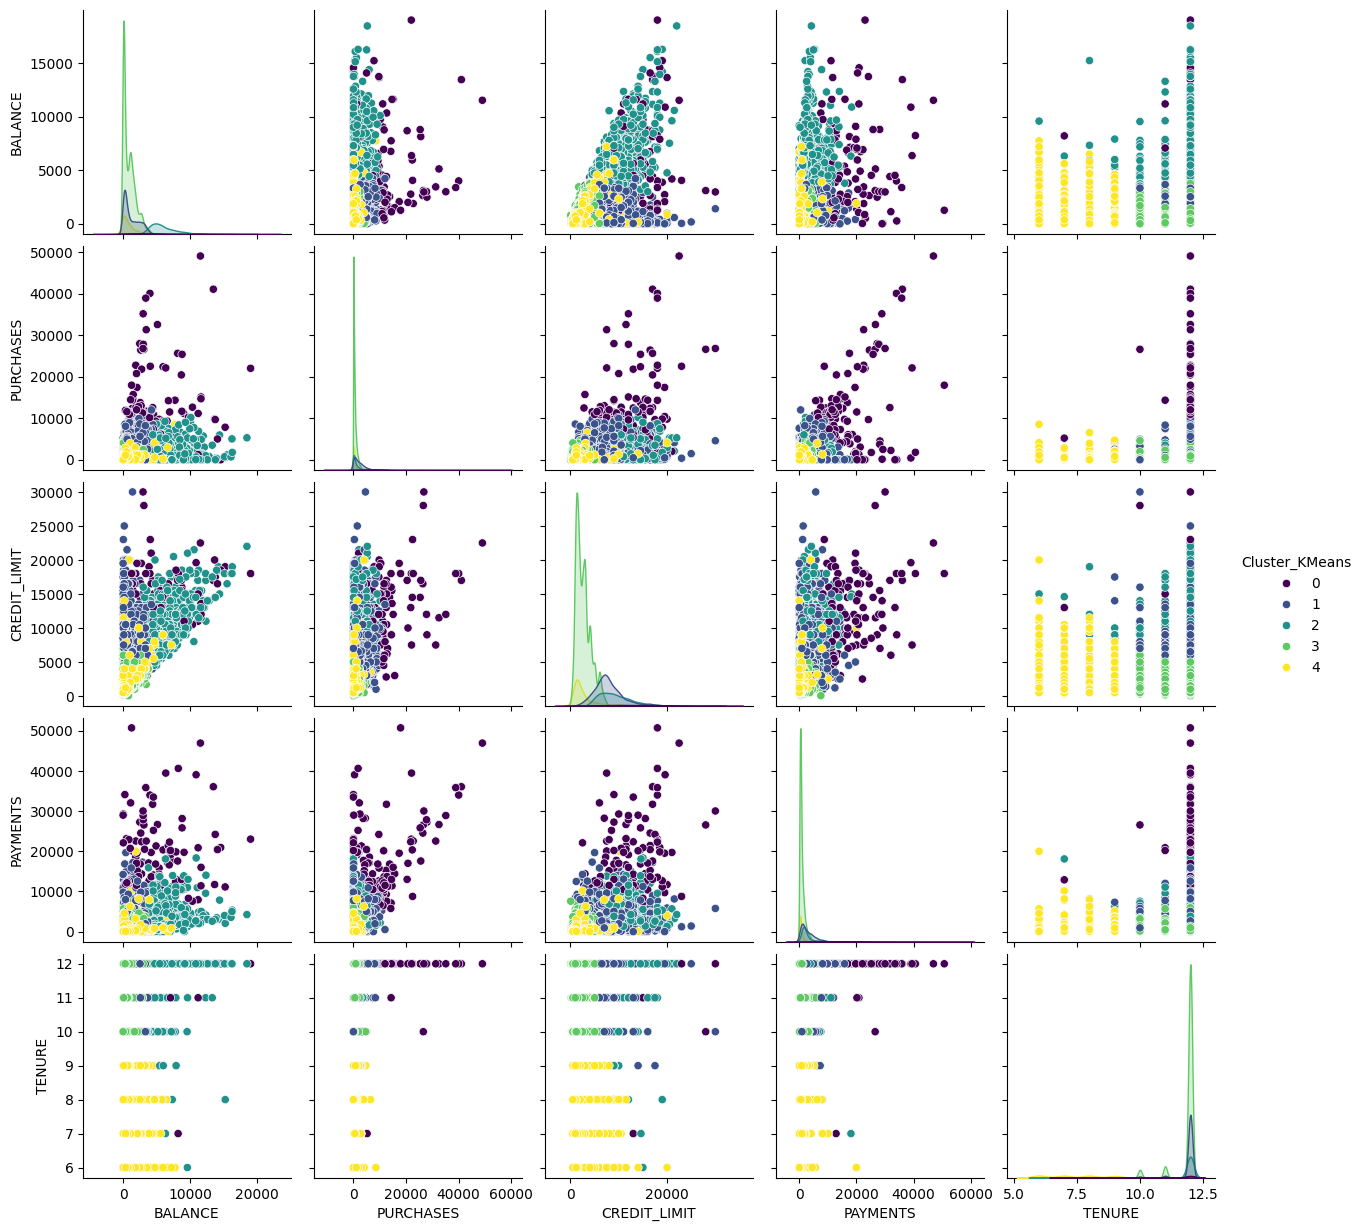

In [55]:
# Drawing using Pairplot
sns.pairplot(data[features + ['Cluster_KMeans']], hue='Cluster_KMeans', palette='viridis', diag_kind='kde')
plt.show()

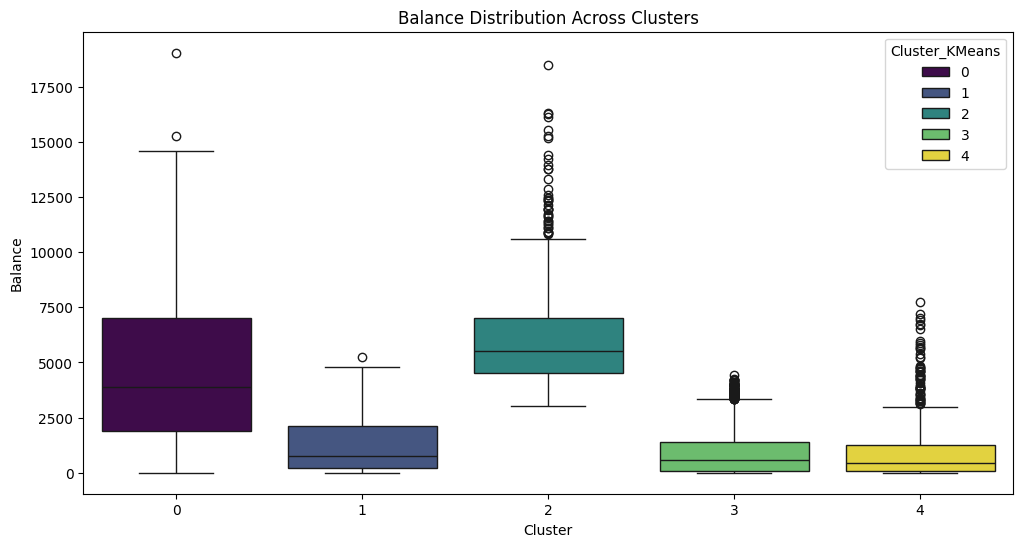

In [ ]:
# Another figure using boxplot.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster_KMeans', y='BALANCE', data=data, palette='viridis', hue = 'Cluster_KMeans')
plt.title("Balance Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Balance")
plt.show()

## **DBSCAN Clustering**(Multivariate Clustering)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
#apply DBSCAN Clustering
dbscan_model = DBSCAN(eps = 0.6, min_samples= 10)
data['Cluster_DBSCAN'] = dbscan_model.fit_predict(x_scaled)

In [ ]:
data['Cluster_DBSCAN'].value_counts()

,count
Cluster_DBSCAN,
0,7044
-1,773
2,305
3,183
6,173
4,166
1,155
5,129
8,11


### As the data are in many dimensions, I will used PCA to plot it.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
x_pca = pca.fit_transform(x_scaled)

In [ ]:
df_pca = pd.DataFrame(x_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster_DBSCAN'] = data['Cluster_DBSCAN']

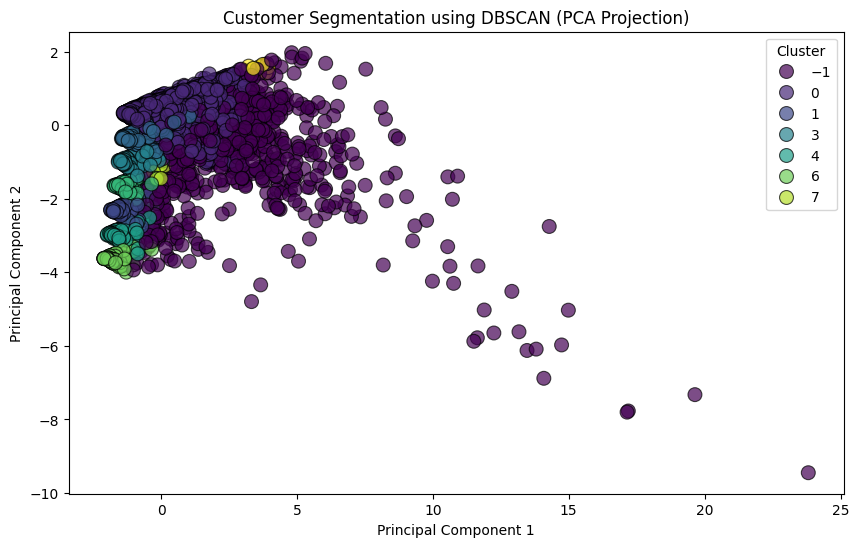

In [ ]:
# Plotting clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_DBSCAN', palette='viridis', data=df_pca, s=100, alpha=0.7, edgecolors='k')
plt.title("Customer Segmentation using DBSCAN (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

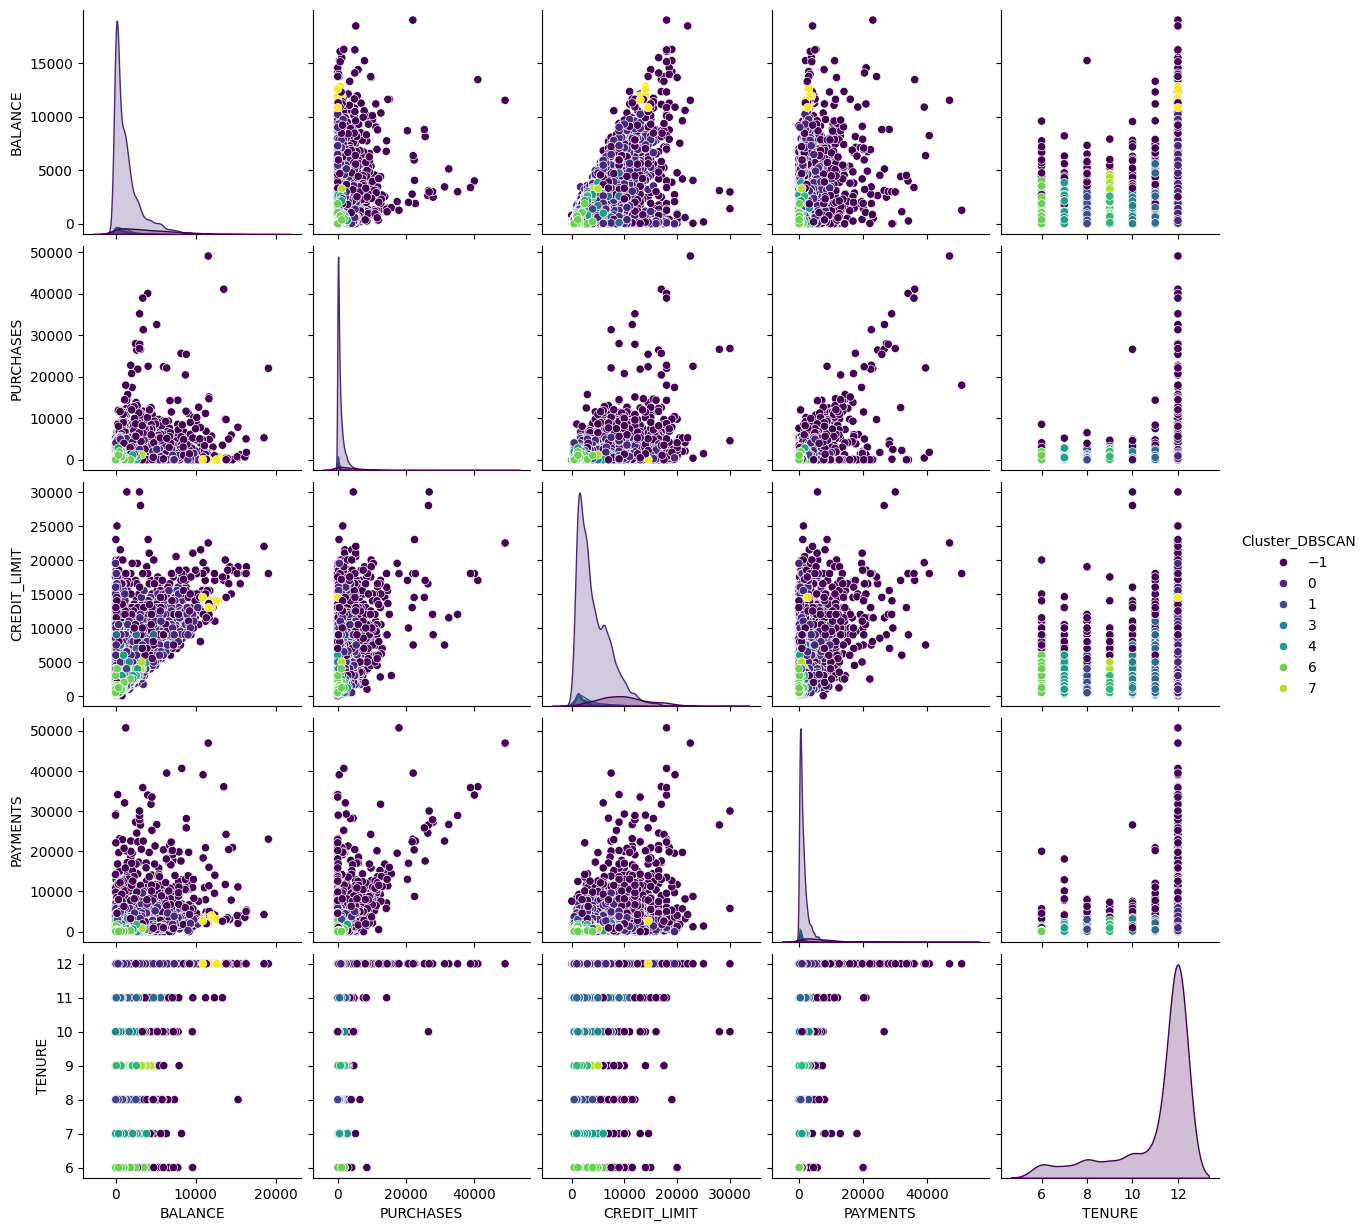

In [ ]:
# Drawing using Pairplot
sns.pairplot(data[features + ['Cluster_DBSCAN']], hue='Cluster_DBSCAN', palette='viridis', diag_kind='kde')
plt.show()

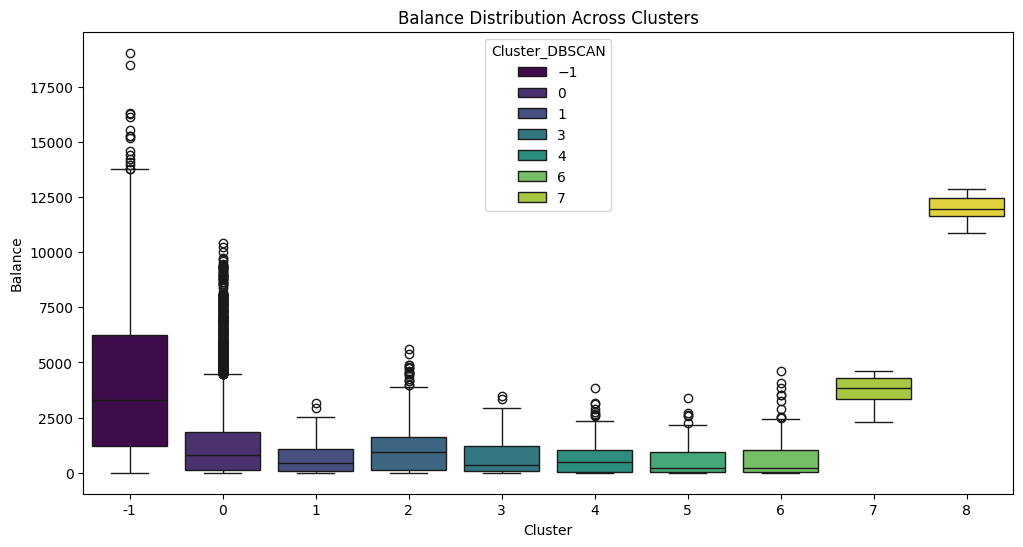

In [ ]:
# Another figure using boxplot.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster_DBSCAN', y='BALANCE', data=data, palette='viridis', hue = 'Cluster_DBSCAN')
plt.title("Balance Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Balance")
plt.show()

### Plotting outliers

In [ ]:
outlier = data[data['Cluster_DBSCAN'] == -1]

In [ ]:
pca = PCA(n_components= 2)
outliers_pca = pca.fit_transform(outlier[features])

In [ ]:
outliers_pca = pd.DataFrame(outliers_pca, columns=['PCA1', 'PCA2'])

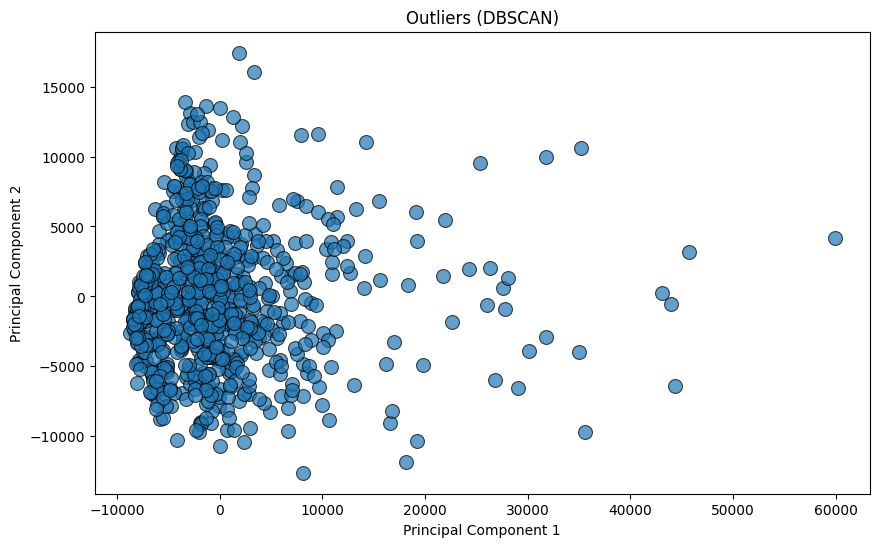

In [ ]:
# Plotting outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=outliers_pca, s=100, alpha=0.7, edgecolors='k')
plt.title("Outliers (DBSCAN)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# **I think KMeans did better in this dataset with k = 5**